In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,level_0,index,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,56.400000
2,2,2,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,58.166667
3,3,3,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,81.600000


In [4]:
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
code_module                     int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
qtr_sum_clicks                float64
half_sum_clicks               float64
threeqtr_sum_clicks           float64
qtr_half_sum_clicks           float64
half_threeqtr_sum_clicks      float64
thrd_sum_clicks               float64
twothrd_sum_clicks            float64
thrd_twothrd


df['imd_band']=df['imd_band'].map({'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
df['module_domain'] = df['module_domain'].map({'SocialScience': 0,'STEM': 1})
df['term'] = df['term'].map({'J': 0,'B': 1})
df['year'] = df['year'].map({'2013': 0,'2014': 1})
df['is_reenrolled'] = df['is_reenrolled'].replace(range(1,12), 1)
df['gender'] = df['gender'].map({'M': 0,'F': 1})
df['age_band'] = df['age_band'].map({'0-35': 0,'35-55': 1,'55<=':2})
df['region'] = df['region'].map({'Scotland': 0,'East Anglian Region': 1,'London Region':2,'South Region': 3,'North Western Region': 4,'West Midlands Region':5,'South West Region': 6,'East Midlands Region': 7,'South East Region':8,'Wales': 9,'Yorkshire Region': 10,'North Region':11,'Ireland':12})
df['pass_fail_ind'] = df['pass_fail_ind'].map({'FAIL':0,'PASS':1})
df['disability'] = df['disability'].map({'N':0,'Y':1})
df['highest_education'] = df['highest_education'].map({'No Formal quals':0,'Lower Than A Level':1,'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4})

In [5]:
df['term'].count()

32593

In [6]:
df['year'].isnull().sum()

0

In [7]:
df.groupby(['year','term'])['module_domain'].count()

year  term
0     0        8845
      1        4684
1     0       11260
      1        7804
Name: module_domain, dtype: int64

In [8]:
df.groupby(['year','term']).count()

level_0  index  id_student  code_module  module_domain  \
year term                                                           
0    0        8845   8845        8845         8845           8845   
     1        4684   4684        4684         4684           4684   
1    0       11260  11260       11260        11260          11260   
     1        7804   7804        7804         7804           7804   

           module_presentation_length  num_of_prev_attempts  final_result  \
year term                                                                   
0    0                           8845                  8845          8845   
     1                           4684                  4684          4684   
1    0                          11260                 11260         11260   
     1                           7804                  7804          7804   

           date_registration  disability  gender  age_band  region  \
year term                                                            
0    0                  8835        8845    8845      8845    8845   
     1                  4676        4684    4684      4684    4684   
1    0                 11251       11260   11260     11260   11260   
     1                  7786        7804    7804      7804    7804   

           highest_education  imd_band  studied_credits  b4_sum_clicks  \
year term                                                                
0    0                  8845      8578             8845           7012   
     1                  4684      4507             4684           3789   
1    0                 11260     10865            11260           8822   
     1                  7804      7532             7804           5941   

           qtr_sum_clicks  half_sum_clicks  threeqtr_sum_clicks  \
year term                                                         
0    0               7012             7012                 7012   
     1               3789             3789                 3789   
1    0               8822             8822                 8822   
     1               5941             5941                 5941   

           qtr_half_sum_clicks  half_threeqtr_sum_clicks  thrd_sum_clicks  \
year term                                                                   
0    0                    7012                      7012             7012   
     1                    3789                      3789             3789   
1    0                    8822                      8822             8822   
     1                    5941                      5941             5941   

           twothrd_sum_clicks  thrd_twothrd_sum_clicks  allclicks  \
year term                                                           
0    0                   7012                     7012       7012   
     1                   3789                     3789       3789   
1    0                   8822                     8822       8822   
     1                   5941                     5941       5941   

           std_half_score  
year term                  
0    0               7007  
     1               3781  
1    0               8818  
     1               5938

### Chek observations for Year 2013 Term J and Term B STEM class

In [9]:
df.groupby(['year','term','module_domain']).count()

level_0  index  id_student  code_module  \
year term module_domain                                            
0    0    0                 3572   3572        3572         3572   
          1                 5273   5273        5273         5273   
     1    0                 1767   1767        1767         1767   
          1                 2917   2917        2917         2917   
1    0    0                 3406   3406        3406         3406   
          1                 7854   7854        7854         7854   
     1    0                 2446   2446        2446         2446   
          1                 5358   5358        5358         5358   

                         module_presentation_length  num_of_prev_attempts  \
year term module_domain                                                     
0    0    0                                    3572                  3572   
          1                                    5273                  5273   
     1    0                                    1767                  1767   
          1                                    2917                  2917   
1    0    0                                    3406                  3406   
          1                                    7854                  7854   
     1    0                                    2446                  2446   
          1                                    5358                  5358   

                         final_result  date_registration  disability  gender  \
year term module_domain                                                        
0    0    0                      3572               3570        3572    3572   
          1                      5273               5265        5273    5273   
     1    0                      1767               1766        1767    1767   
          1                      2917               2910        2917    2917   
1    0    0                      3406               3405        3406    3406   
          1                      7854               7846        7854    7854   
     1    0                      2446               2441        2446    2446   
          1                      5358               5345        5358    5358   

                         age_band  region  highest_education  imd_band  \
year term module_domain                                                  
0    0    0                  3572    3572               3572      3538   
          1                  5273    5273               5273      5040   
     1    0                  1767    1767               1767      1746   
          1                  2917    2917               2917      2761   
1    0    0                  3406    3406               3406      3384   
          1                  7854    7854               7854      7481   
     1    0                  2446    2446               2446      2430   
          1                  5358    5358               5358      5102   

                         studied_credits  b4_sum_clicks  qtr_sum_clicks  \
year term module_domain                                                   
0    0    0                         3572           2859            2859   
          1                         5273           4153            4153   
     1    0                         1767           1364            1364   
          1                         2917           2425            2425   
1    0    0                         3406           2724            2724   
          1                         7854           6098            6098   
     1    0                         2446           1874            1874   
          1                         5358           4067            4067   

                         half_sum_clicks  threeqtr_sum_clicks  \
year term module_domain                                         
0    0    0                         2859                 2859   
          1                         4153                 4153   
     1    0         

### Create a temporaray data frame 

In [49]:
tempDf = df[['year','term','code_module','module_domain','region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]
# tempDf.head(20)

In [50]:
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,code_module,module_domain,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,0,0,3,1,3,0,0,NaN,NaN,NaN,2,261,0,0,3,9.0,60,-68.0
2,0,0,3,1,2,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
10,0,1,3,1,1,1,0,NaN,NaN,NaN,0,240,0,0,2,4.0,90,-128.0
24,0,0,5,1,8,0,0,14.666667,367.0,111.0,1,268,2,0,3,8.0,60,-47.0
29,0,0,4,1,9,0,0,NaN,NaN,NaN,1,268,0,0,1,0.0,30,-61.0
32,0,0,3,1,6,0,0,35.250000,347.0,8.0,0,261,0,0,1,6.0,60,-74.0
40,0,0,3,1,1,1,1,74.958333,728.0,64.0,0,261,0,0,1,3.0,60,-134.0
41,0,0,3,1,10,1,0,52.166667,305.0,24.0,1,261,0,0,3,1.0,70,-190.0
52,0,0,5,1,5,0,0,94.333333,4595.0,146.0,0,268,0,1,1,4.0,60,-31.0
54,0,0,3,1,7,0,0,75.416667,265.0,61.0,0,261,0,1,2,8.0,60,-96.0


In [51]:
tempDf.count()

year                          8190
term                          8190
code_module                   8190
module_domain                 8190
region                        8190
gender                        8190
disability                    8190
std_half_score                6569
half_sum_clicks               6578
b4_sum_clicks                 6578
age_band                      8190
module_presentation_length    8190
num_of_prev_attempts          8190
final_result                  8190
highest_education             8190
imd_band                      7801
studied_credits               8190
date_registration             8175
dtype: int64

In [52]:
tempDf.groupby(['term']).count()

,year,code_module,module_domain,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
term,,,,,,,,,,,,,,,,,
0,5273,5273,5273,5273,5273,5273,4149,4153,4153,5273,5273,5273,5273,5273,5040,5273,5265
1,2917,2917,2917,2917,2917,2917,2420,2425,2425,2917,2917,2917,2917,2917,2761,2917,2910


In [53]:
tempDf=tempDf.drop(columns=['year','term','module_domain'])

In [54]:
# Create a Heatmap
## import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

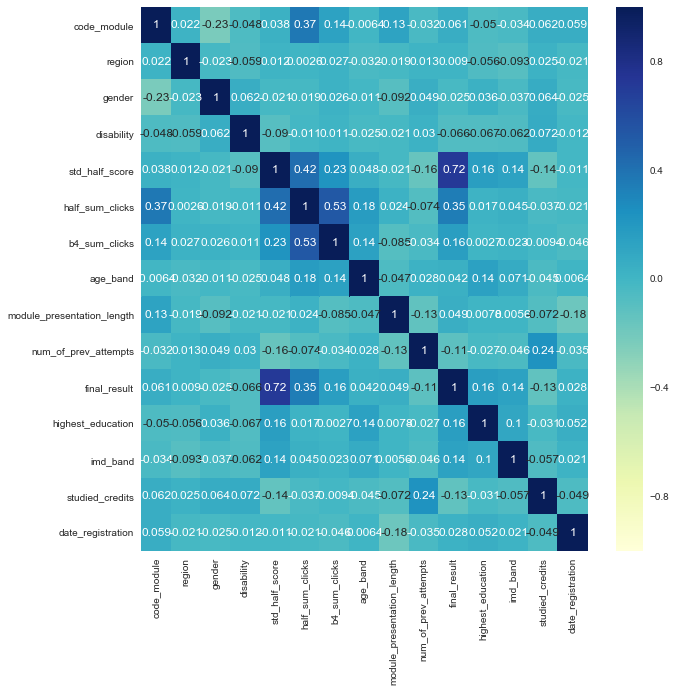

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(tempDf.corr(),vmin=-1,cmap='YlGnBu',annot=True)
plt.show()

## Logistic Regression

In [56]:
tempDf.head(20)

,code_module,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,3,3,0,0,NaN,NaN,NaN,2,261,0,0,3,9.0,60,-68.0
2,3,2,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
10,3,1,1,0,NaN,NaN,NaN,0,240,0,0,2,4.0,90,-128.0
24,5,8,0,0,14.666667,367.0,111.0,1,268,2,0,3,8.0,60,-47.0
29,4,9,0,0,NaN,NaN,NaN,1,268,0,0,1,0.0,30,-61.0
32,3,6,0,0,35.250000,347.0,8.0,0,261,0,0,1,6.0,60,-74.0
40,3,1,1,1,74.958333,728.0,64.0,0,261,0,0,1,3.0,60,-134.0
41,3,10,1,0,52.166667,305.0,24.0,1,261,0,0,3,1.0,70,-190.0
52,5,5,0,0,94.333333,4595.0,146.0,0,268,0,1,1,4.0,60,-31.0
54,3,7,0,0,75.416667,265.0,61.0,0,261,0,1,2,8.0,60,-96.0


In [57]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.head(20)

,code_module,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
2,3,2,0,0,58.166667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
24,5,8,0,0,14.666667,367.0,111.0,1,268,2,0,3,8.0,60,-47.0
32,3,6,0,0,35.250000,347.0,8.0,0,261,0,0,1,6.0,60,-74.0
40,3,1,1,1,74.958333,728.0,64.0,0,261,0,0,1,3.0,60,-134.0
41,3,10,1,0,52.166667,305.0,24.0,1,261,0,0,3,1.0,70,-190.0
52,5,5,0,0,94.333333,4595.0,146.0,0,268,0,1,1,4.0,60,-31.0
54,3,7,0,0,75.416667,265.0,61.0,0,261,0,1,2,8.0,60,-96.0
59,5,7,0,0,66.333333,1306.0,179.0,0,268,1,0,2,4.0,60,-32.0
68,3,8,0,0,5.833333,112.0,17.0,1,261,2,0,2,0.0,60,-102.0
73,3,4,0,0,50.541667,408.0,0.0,1,261,1,0,2,4.0,60,-44.0


In [58]:
tempDf.count()

code_module                   6216
region                        6216
gender                        6216
disability                    6216
std_half_score                6216
half_sum_clicks               6216
b4_sum_clicks                 6216
age_band                      6216
module_presentation_length    6216
num_of_prev_attempts          6216
final_result                  6216
highest_education             6216
imd_band                      6216
studied_credits               6216
date_registration             6216
dtype: int64

In [200]:
# Define our predictors
X=tempDf[['disability','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']

In [201]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.444690
         Iterations 6
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.348    
Dependent Variable:    final_result      AIC:               5546.3907
Date:                  2019-12-03 00:21  BIC:               5607.0046
No. Observations:      6216              Log-Likelihood:    -2764.2  
Df Model:              8                 LL-Null:           -4242.3  
Df Residuals:          6207              LLR p-value:       0.0000   
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        6.0000                                        
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
disability           -0.3559   0.1146  -3.1048 0.0019 -0.5806 -0.1312
gender          

In [202]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [203]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


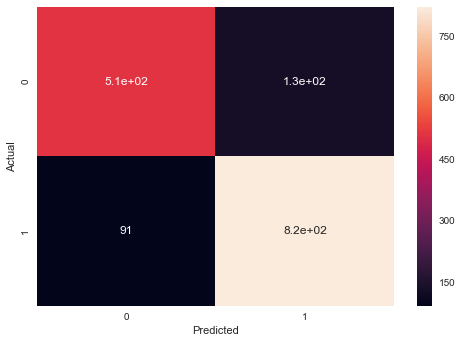

In [204]:
# Get a Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [205]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8571428571428571


In [206]:
# Print the Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8625393494228751


In [207]:
# Print the Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9003285870755751


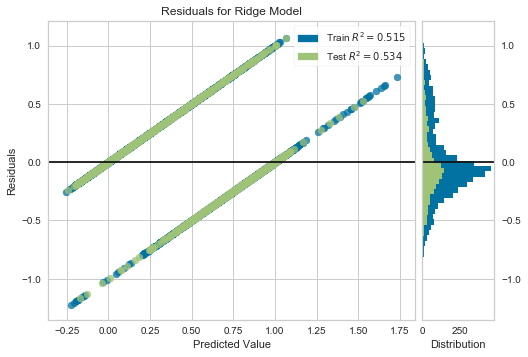

In [208]:
## Residuals Plot
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
model = ResidualsPlot(Ridge())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

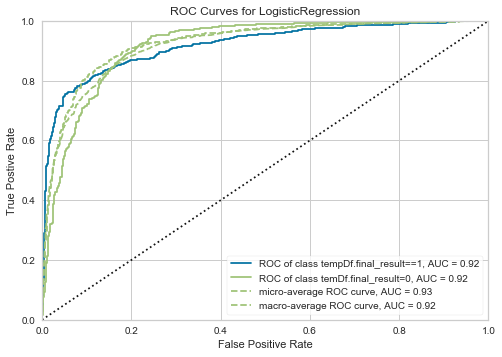

In [209]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["tempDf.final_result==1", "temDf.final_result=0"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Diving Deeper into the Results

In [210]:
print(X_test) # test dataset (without the actual outcome)

       disability  gender  std_half_score  half_sum_clicks  imd_band  \
8922            0       0       77.578947            541.0       5.0   
18199           0       0       58.125000           1138.0       7.0   
10357           0       0       84.500000           3540.0       4.0   
31020           1       1       73.964912           1339.0       1.0   
8566            0       0       18.000000            625.0       8.0   
10814           0       0       88.500000           1455.0       2.0   
2011            0       1       55.333333           1117.0       3.0   
16939           0       0       71.666667           1765.0       7.0   
7052            0       1       74.750000            906.0       7.0   
17274           0       0       42.666667            796.0       5.0   
10092           0       0       36.000000            843.0       2.0   
2212            1       1       61.903509            547.0       8.0   
2192            0       1       86.666667           1656.0      

In [211]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [212]:
# Checking the prediction for a New Set of Data
# Let's use our model to predict Year 2014 STEM class results. 
# My goal is to use the existing logistic regression model to predict whether the new student will pass or fail.
# Create a new temporary data frame
tempDf2 = df[['year','term','module_domain','final_result','code_module','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','module_presentation_length','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits','date_registration']]
tempDf2 = tempDf2.loc[(tempDf2.year == 1)&(tempDf2.module_domain==1)]
# Show first 20 observations of the dataset
tempDf2.head(20)

,year,term,module_domain,final_result,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,module_presentation_length,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits,date_registration
3,1,0,1,0,3,0,0,NaN,NaN,NaN,262,3.0,2,1,3,60,-38.0
7,1,0,1,1,2,1,0,181.0,475.0,74.325000,269,5.0,0,0,2,120,-110.0
11,1,1,1,1,3,1,0,3.0,1069.0,57.333333,241,4.0,0,1,2,60,-54.0
15,1,1,1,1,4,0,0,51.0,757.0,84.555556,241,9.0,0,0,3,60,-47.0
16,1,0,1,0,2,1,0,201.0,796.0,3.900000,269,4.0,0,0,3,60,-114.0
17,1,0,1,0,3,1,0,8.0,105.0,14.000000,262,1.0,0,2,3,150,-68.0
23,1,1,1,1,5,1,0,308.0,8316.0,81.000000,241,2.0,1,0,3,90,-25.0
25,1,1,1,0,5,0,0,NaN,NaN,NaN,241,0.0,1,0,1,60,-73.0
30,1,0,1,1,2,0,0,28.0,1001.0,94.450000,269,7.0,0,0,3,120,-156.0
31,1,1,1,0,5,1,0,0.0,946.0,33.000000,241,1.0,1,0,1,120,-65.0


In [213]:
tempDf2.count()

year                          13212
term                          13212
module_domain                 13212
final_result                  13212
code_module                   13212
gender                        13212
disability                    13212
b4_sum_clicks                 10165
half_sum_clicks               10165
std_half_score                10160
module_presentation_length    13212
imd_band                      12583
age_band                      13212
num_of_prev_attempts          13212
highest_education             13212
studied_credits               13212
date_registration             13191
dtype: int64

In [214]:
# Again, we drop those missing values
tempDf2=tempDf2.dropna()
tempDf2.head(20)

,year,term,module_domain,final_result,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,module_presentation_length,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits,date_registration
7,1,0,1,1,2,1,0,181.0,475.0,74.325000,269,5.0,0,0,2,120,-110.0
11,1,1,1,1,3,1,0,3.0,1069.0,57.333333,241,4.0,0,1,2,60,-54.0
15,1,1,1,1,4,0,0,51.0,757.0,84.555556,241,9.0,0,0,3,60,-47.0
16,1,0,1,0,2,1,0,201.0,796.0,3.900000,269,4.0,0,0,3,60,-114.0
17,1,0,1,0,3,1,0,8.0,105.0,14.000000,262,1.0,0,2,3,150,-68.0
23,1,1,1,1,5,1,0,308.0,8316.0,81.000000,241,2.0,1,0,3,90,-25.0
30,1,0,1,1,2,0,0,28.0,1001.0,94.450000,269,7.0,0,0,3,120,-156.0
31,1,1,1,0,5,1,0,0.0,946.0,33.000000,241,1.0,1,0,1,120,-65.0
33,1,0,1,0,3,0,0,6.0,61.0,56.100000,262,6.0,0,1,1,60,-131.0
35,1,1,1,1,5,0,0,2.0,696.0,67.000000,241,3.0,0,0,3,60,-24.0


In [215]:
tempDf2.count()

year                          9604
term                          9604
module_domain                 9604
final_result                  9604
code_module                   9604
gender                        9604
disability                    9604
b4_sum_clicks                 9604
half_sum_clicks               9604
std_half_score                9604
module_presentation_length    9604
imd_band                      9604
age_band                      9604
num_of_prev_attempts          9604
highest_education             9604
studied_credits               9604
date_registration             9604
dtype: int64

In [216]:
df2 = pd.DataFrame(tempDf2,columns= ['disability','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits'])

In [217]:
# Show the first 20 observations
df2.head(20)

,disability,gender,std_half_score,half_sum_clicks,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits
7,0,1,74.325000,475.0,5.0,0,0,2,120
11,0,1,57.333333,1069.0,4.0,0,1,2,60
15,0,0,84.555556,757.0,9.0,0,0,3,60
16,0,1,3.900000,796.0,4.0,0,0,3,60
17,0,1,14.000000,105.0,1.0,0,2,3,150
23,0,1,81.000000,8316.0,2.0,1,0,3,90
30,0,0,94.450000,1001.0,7.0,0,0,3,120
31,0,1,33.000000,946.0,1.0,1,0,1,120
33,0,0,56.100000,61.0,6.0,0,1,1,60
35,0,0,67.000000,696.0,3.0,0,0,3,60


In [218]:
# Define our predictors, this is the model we use in the previous dataset (tempDf)
X=tempDf[['disability','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
# See how our model works
y_pred_new=logistic_regression.predict(df2)
y_test_new=tempDf2['final_result']

In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4250
           1       0.83      0.84      0.84      5354

    accuracy                           0.82      9604
   macro avg       0.81      0.81      0.81      9604
weighted avg       0.82      0.82      0.82      9604



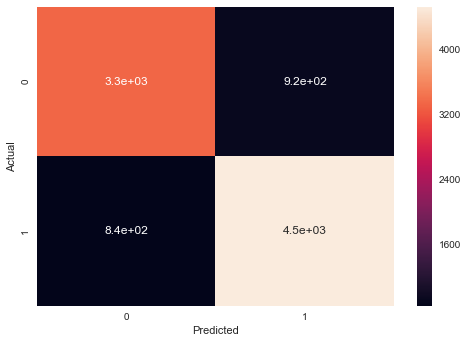

In [221]:
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [222]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.8166389004581425


## Create a temporary data frame for Year 2013 Term J and Term B Social Science Class

In [223]:
SSDf = df[['year','term','code_module','module_domain','region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]

In [225]:
SSDf = SSDf.loc[(SSDf.year == 0)&(SSDf.module_domain==0)]
SSDf.head(20)

,year,term,code_module,module_domain,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
4,0,0,0,0,1,0,0,81.600000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,0,1,1,0,1,1,0,38.813953,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,0,0,1,0,1,1,0,NaN,NaN,NaN,0,268,0,0,2,4.0,60,-194.0
8,0,0,1,0,9,0,0,89.612903,365.0,6.0,0,268,0,1,2,5.0,60,-27.0
12,0,0,6,0,7,0,0,0.000000,263.0,0.0,0,261,0,1,2,8.0,30,-64.0
14,0,1,1,0,1,1,0,63.000000,1465.0,5.0,0,240,0,1,1,2.0,120,-73.0
18,0,0,1,0,0,1,0,NaN,NaN,NaN,0,268,0,0,1,2.0,120,-31.0
21,0,0,6,0,4,0,0,0.000000,380.0,36.0,1,261,0,1,1,1.0,30,-37.0
27,0,0,1,0,5,0,0,NaN,NaN,NaN,0,268,4,0,2,0.0,60,-60.0
34,0,0,1,0,8,1,0,NaN,NaN,NaN,1,268,0,0,1,4.0,60,-36.0


In [226]:
SSDf.count()

year                          5339
term                          5339
code_module                   5339
module_domain                 5339
region                        5339
gender                        5339
disability                    5339
std_half_score                4219
half_sum_clicks               4223
b4_sum_clicks                 4223
age_band                      5339
module_presentation_length    5339
num_of_prev_attempts          5339
final_result                  5339
highest_education             5339
imd_band                      5284
studied_credits               5339
date_registration             5336
dtype: int64

In [227]:
SSDf.groupby(['term']).count()

,year,code_module,module_domain,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
term,,,,,,,,,,,,,,,,,
0,3572,3572,3572,3572,3572,3572,2858,2859,2859,3572,3572,3572,3572,3572,3538,3572,3570
1,1767,1767,1767,1767,1767,1767,1361,1364,1364,1767,1767,1767,1767,1767,1746,1767,1766


In [228]:
SSDf=SSDf.drop(columns=['year','term','module_domain'])

In [229]:
SSDf.head(5)

,code_module,region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
4,0,1,0,0,81.600000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,1,1,1,0,38.813953,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,1,1,1,0,NaN,NaN,NaN,0,268,0,0,2,4.0,60,-194.0
8,1,9,0,0,89.612903,365.0,6.0,0,268,0,1,2,5.0,60,-27.0
12,6,7,0,0,0.000000,263.0,0.0,0,261,0,1,2,8.0,30,-64.0


In [230]:
# drop missing values
SSDf=SSDf.dropna()
SSDf.count()

code_module                   4171
region                        4171
gender                        4171
disability                    4171
std_half_score                4171
half_sum_clicks               4171
b4_sum_clicks                 4171
age_band                      4171
module_presentation_length    4171
num_of_prev_attempts          4171
final_result                  4171
highest_education             4171
imd_band                      4171
studied_credits               4171
date_registration             4171
dtype: int64

In [311]:
# Define our predictors
X=SSDf[['region','code_module','disability','module_presentation_length','date_registration','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=SSDf['final_result']

In [312]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455352
         Iterations 6
                              Results: Logit
Model:                   Logit               Pseudo R-squared:    0.298    
Dependent Variable:      final_result        AIC:                 3824.5463
Date:                    2019-12-03 00:49    BIC:                 3906.9132
No. Observations:        4171                Log-Likelihood:      -1899.3  
Df Model:                12                  LL-Null:             -2704.3  
Df Residuals:            4158                LLR p-value:         0.0000   
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          6.0000                                            
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
region           

In [313]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [314]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


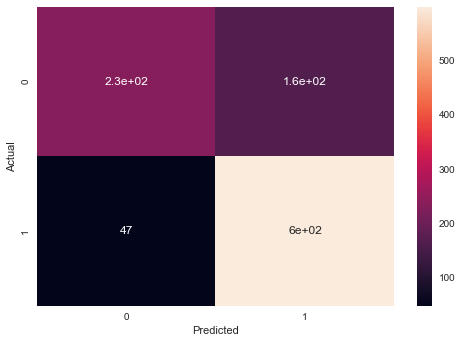

In [315]:
# Get a Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [316]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7976989453499521


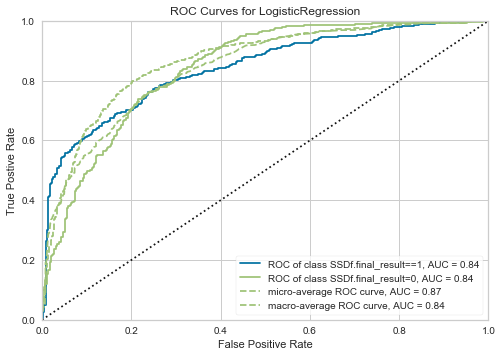

In [317]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["SSDf.final_result==1", "SSDf.final_result=0"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [318]:
# Checking the prediction for a New Set of Data
# Let's use our model to predict Year 2014 Social Science class results. 
# My goal is to use the existing logistic regression model to predict whether the new student will pass or fail.
# Create a new temporary data frame
SSDf2 = df[['year','term','module_domain','final_result','code_module','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','module_presentation_length','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits','date_registration','region']]
SSDf2 = SSDf2.loc[(SSDf2.year == 1)&(SSDf2.module_domain==0)]
# Show first 20 observations of the dataset
SSDf2.head(20)

,year,term,module_domain,final_result,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,module_presentation_length,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits,date_registration,region
1,1,0,0,1,0,0,0,256.0,1347.0,56.400000,269,8.0,2,0,3,60,-52.0,0
9,1,1,0,1,6,1,1,12.0,42.0,0.000000,241,1.0,0,0,1,30,-25.0,10
13,1,0,0,1,0,1,0,30.0,217.0,44.200000,269,6.0,0,0,1,60,-18.0,3
19,1,1,0,0,1,1,0,NaN,NaN,NaN,234,2.0,0,1,1,120,-156.0,0
20,1,1,0,0,1,1,0,0.0,13.0,32.883721,234,2.0,0,2,2,60,-139.0,2
22,1,0,0,1,0,1,0,241.0,1408.0,84.600000,269,6.0,1,0,2,60,-38.0,1
26,1,0,0,1,1,1,0,137.0,993.0,68.000000,262,6.0,1,1,1,60,-92.0,1
28,1,0,0,0,1,0,1,7.0,201.0,61.666667,262,2.0,0,0,2,90,-101.0,6
39,1,1,0,0,1,0,1,NaN,NaN,NaN,234,0.0,0,4,1,120,-191.0,0
42,1,0,0,1,0,0,0,349.0,850.0,76.400000,269,4.0,1,0,1,60,-130.0,10


In [319]:
# Again, we drop those missing values
SSDf2=SSDf2.dropna()
SSDf2.head(20)

,year,term,module_domain,final_result,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,module_presentation_length,imd_band,age_band,num_of_prev_attempts,highest_education,studied_credits,date_registration,region
1,1,0,0,1,0,0,0,256.0,1347.0,56.400000,269,8.0,2,0,3,60,-52.0,0
9,1,1,0,1,6,1,1,12.0,42.0,0.000000,241,1.0,0,0,1,30,-25.0,10
13,1,0,0,1,0,1,0,30.0,217.0,44.200000,269,6.0,0,0,1,60,-18.0,3
20,1,1,0,0,1,1,0,0.0,13.0,32.883721,234,2.0,0,2,2,60,-139.0,2
22,1,0,0,1,0,1,0,241.0,1408.0,84.600000,269,6.0,1,0,2,60,-38.0,1
26,1,0,0,1,1,1,0,137.0,993.0,68.000000,262,6.0,1,1,1,60,-92.0,1
28,1,0,0,0,1,0,1,7.0,201.0,61.666667,262,2.0,0,0,2,90,-101.0,6
42,1,0,0,1,0,0,0,349.0,850.0,76.400000,269,4.0,1,0,1,60,-130.0,10
62,1,1,0,1,6,1,0,5.0,183.0,0.000000,241,2.0,0,0,1,30,-93.0,3
71,1,1,0,1,6,0,0,166.0,1653.0,0.000000,241,4.0,1,0,1,30,-47.0,6


In [320]:
SSDf2.count()

year                          4562
term                          4562
module_domain                 4562
final_result                  4562
code_module                   4562
gender                        4562
disability                    4562
b4_sum_clicks                 4562
half_sum_clicks               4562
std_half_score                4562
module_presentation_length    4562
imd_band                      4562
age_band                      4562
num_of_prev_attempts          4562
highest_education             4562
studied_credits               4562
date_registration             4562
region                        4562
dtype: int64

In [321]:
SST2 = pd.DataFrame(SSDf2,columns= ['region','code_module','disability','module_presentation_length','date_registration','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits'])

In [327]:
# Define our predictors, this is the model we use in the previous dataset (tempDf)
X=SSDf[['region','code_module','disability','module_presentation_length','date_registration','gender','std_half_score','half_sum_clicks','imd_band','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=SSDf['final_result']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [328]:
# See how our model works
y_pred_new=logistic_regression.predict(SST2)
y_test_new=SSDf2['final_result']

In [329]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59      1541
           1       0.77      0.96      0.86      3021

    accuracy                           0.79      4562
   macro avg       0.81      0.71      0.72      4562
weighted avg       0.80      0.79      0.77      4562



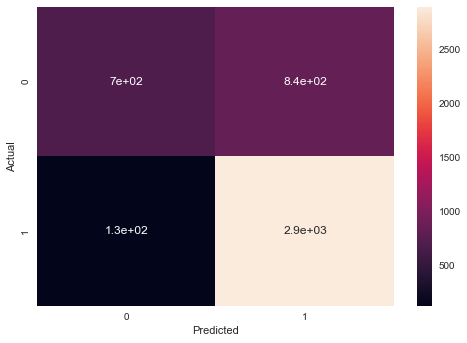

In [330]:
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [331]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.7871547566856641
